In [9]:
from math import sqrt #В ходе процесса мы захотим посчитать корень из дисперсии
from scipy.stats import laplace #Возьмем Лапласа, я его отчего-то очень люблю
from scipy.stats import norm #Нормальное распределение будет не лишним для наглядности ЦПТ.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

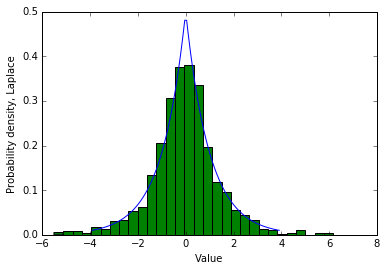

In [39]:
x = np.linspace(laplace.ppf(0.01), laplace.ppf(0.99), 100) #Задаем пространство, чтоб функции было не тесно
y = laplace.pdf(x) #Считаем Лапласа
plt.plot(x, y) #Рисуем теоретическое распределение Лапласа
his = laplace.rvs(size=1000) #Создаем рандомный набор чисел из возможных значений взятой функции
plt.hist(his, normed = True, bins=30) # Смотрим как выглядит Лаплас в виде гистограммы
plt.xlabel(u'Value')
plt.ylabel(u'Probability density, Laplace')

In [40]:
mean, var = laplace.stats(moments = 'mv') #Нашли теоретическое среднее (выборочное) и дисперсию
mean, var

(array(0.0), array(2.0))

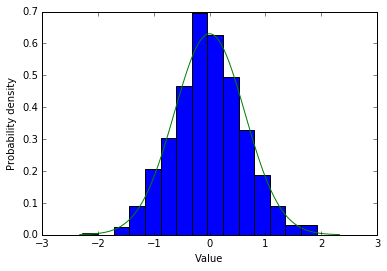

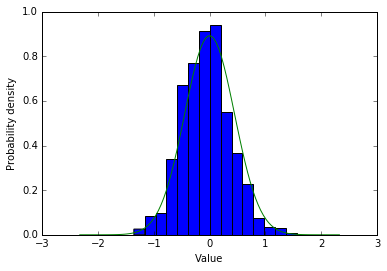

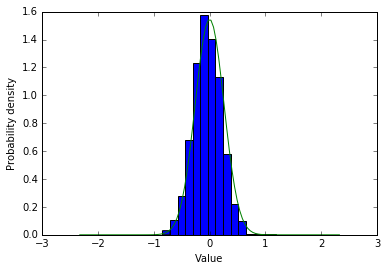

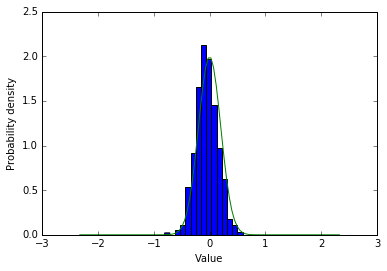

In [38]:
#Дальше генерим выборки (1000 штук) из 5, 10 и 50 элементов, для каждой из которых считаем среднее
samplefive = [np.mean(np.random.choice(his, 5)) for i in range(1000)]
sampleten = [np.mean(np.random.choice(his, 10)) for i in range(1000)]
samplefif = [np.mean(np.random.choice(his, 50)) for i in range(1000)]
samplethirty  = [np.mean(np.random.choice(his, 30)) for i in range(1000)]

sample = [[samplefive, 5], [sampleten, 10], [samplethirty, 30], [samplefif, 50]]
#Строим гистограммы полученных выборочных средних и на то же графике смотрим нормальное распределение,
#которому передаем в параметры среднее выборочное теоретическое (для лапласа) и корень из дисперсии, 
#деленной на количество элементов в выборке.
for i in sample:
    plt.figure()
    plt.xlabel(u'Value')
    plt.ylabel(u'Probability density')
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
    y = norm.pdf(x, loc = mean, scale = sqrt(var/i[1]))
    plt.hist(i[0], normed = True, bins = 15)
    plt.plot(x,y)
#Наслаждаемся

Из полученных графиков видно, что чем больше в выборке значений, по которым считается выборочное среднее, тем луше полученная гистограмма апроксимируется нормальным распределением. но кроме того, чем больше значений, тем гистограмма становится уже и менее информативной. При n=30 получаем достаточно хорошую апроксимацию, что подтверждает утверждение ЦПТ.